<a href="https://colab.research.google.com/github/rounakburman/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

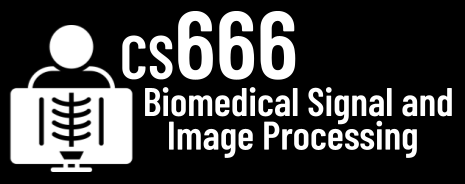

# Assignment 1

In [78]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [79]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [80]:
from biosppy import storage
!wget https://cs666.org/data/ecg.txt
signal, metadata = storage.load_txt('ecg.txt')
import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt

--2023-02-14 02:11:47--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt’

ecg.txt             100%[===================>] 102.62K  --.-KB/s    in 0.02s   

2023-02-14 02:11:47 (4.80 MB/s) - ‘ecg.txt’ saved [105085/105085]



In [81]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

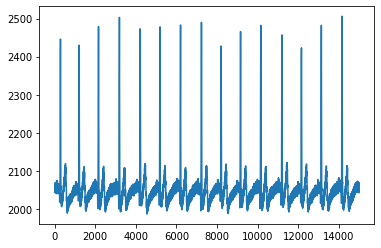

In [82]:
##plt.plot(signal[0:1000])
plt.plot(signal)

In [83]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [84]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15000/(SAMPLING_RATE) ### TODO!

In [85]:
### time = ((1/SAMPLING_RATE * i) for i in range(len(signal)))

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [86]:
output = ecg.ecg(signal=signal, sampling_rate=1000.0,show=False) ### TODO

In [87]:
output[1]

array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [88]:
### TODO plot unfiltered signal
#first_sec_query = 0
#first_second = signal[first_sec_query*SAMPLING_RATE:(first_sec_query+1)*SAMPLING_RATE]
#plt.plot(first_second)

#second_sec_query = 1
#second_second = signal[second_sec_query*SAMPLING_RATE:(second_sec_query+1)*SAMPLING_RATE]
#plt.plot(second_second)

#third_sec_query = 1
#third_second = signal[third_sec_query*SAMPLING_RATE:(third_sec_query+1)*SAMPLING_RATE]
#plt.plot(third_second)


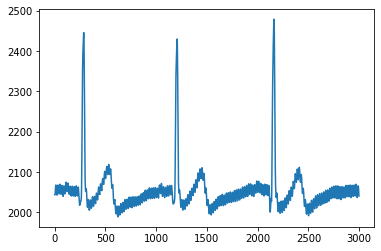

In [89]:
t_range = 3
three_seconds = signal[0:t_range*SAMPLING_RATE]
plt.plot(three_seconds)

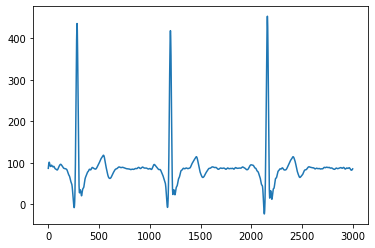

In [90]:
### TODO plot filtered signal
t_range = 3
three_seconds = output[1][0:t_range*SAMPLING_RATE]
plt.plot(three_seconds)


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

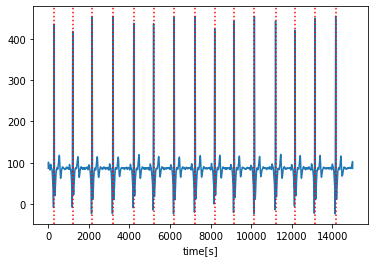

In [91]:
### TODO
rpeaks = output['rpeaks']
plt.plot(output[1])
plt.xlabel('time[s]')
for r in rpeaks:
  plt.axvline(x=r,color='r', ls= ':')

plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [92]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


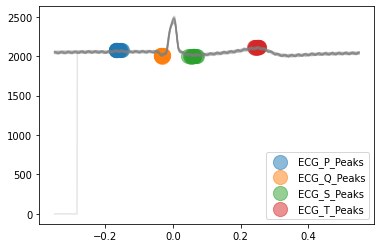

In [93]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

#ecg_sig = nk.data(dataset="ecg_1000Hz")
#nk_ecg = nk.ecg_process(ecg_sig, sampling_rate=1000, method = "neurokit")
#nk_r_peaks = nk.ecg_peaks(ecg_sig, sampling_rate=1000)
waves_peak = nk.ecg_delineate(signal,rpeaks,sampling_rate=1000,method="peak",show=True,show_type='peaks')


In [94]:
# TODO Does the detection work well?
print('Yes it does !')

Yes it does !


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

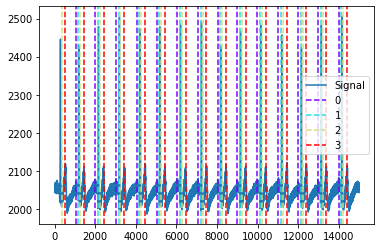

In [95]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Detect P Q S T Peaks for the full signal before filtering

_,waves_peak = nk.ecg_delineate(signal,rpeaks,sampling_rate=1000,method="peak")

graph = nk.events_plot([waves_peak['ECG_P_Peaks'][:],waves_peak['ECG_Q_Peaks'],waves_peak['ECG_S_Peaks'],waves_peak['ECG_T_Peaks']],signal[:])

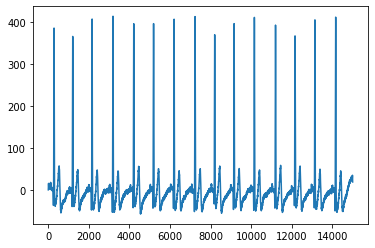

In [96]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
import numpy as np
import pandas as pd
lowcut = 0.5
highcut = 40
order = 2
ecg_filter = nk.signal_filter(signal, highcut=highcut, lowcut=lowcut, method='butter', order=order, sampling_rate=SAMPLING_RATE)
plt.plot(ecg_filter[0:15000])
#_,waves_peak = ecg_filter(filter,rpeaks,sampling_rate=1000,method="peak",show=True,show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


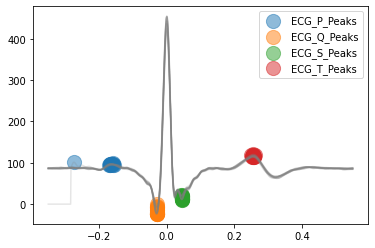

In [97]:
# Finally, run the delineation on the filtered signal from BioSPPY.
waves1_peak = nk.ecg_delineate(output[1],rpeaks,sampling_rate=1000,method="peak",show=True,show_type='peaks')

In [98]:
# TODO Which one works the best?
print('The signal from Biosppy gives a much clearer representation.')

The signal from Biosppy gives a much clearer representation.


In [99]:
#CITATIONS
#https://biosppy.readthedocs.io/en/latest/biosppy.html
nk.cite()
#https://doi.org/10.3758/s13428-020-01516-y
#https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


You can cite NeuroKit2 as follows:

- Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H.,
Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing.
Behavior Research Methods, 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y


Full bibtex reference:

@article{Makowski2021neurokit,
    author = {Dominique Makowski and Tam Pham and Zen J. Lau and Jan C. Brammer and Fran{\c{c}}ois Lespinasse and Hung Pham and Christopher Schölzel and S. H. Annabel Chen},
    title = {{NeuroKit}2: A Python toolbox for neurophysiological signal processing},
    journal = {Behavior Research Methods},
    volume = {53},
    number = {4},
    pages = {1689--1696},
    publisher = {Springer Science and Business Media {LLC}},
    doi = {10.3758/s13428-020-01516-y},
    url = {https://doi.org/10.3758%2Fs13428-020-01516-y},
    year = 2021,
    month = {feb}
}



In [100]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#